# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

# Loading data

In [2]:
data = pd.read_csv('/kaggle/input/iris-dataset-elarged-with-smote/iris_synthetic_data.csv')

In [3]:
data.head(3)

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa


# Checking for missing values

In [4]:
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

# Data Splitting

In [5]:
X = data.drop(columns=['label'])
y = data['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting Classifier

In [7]:
gbm_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.098, max_depth=80, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

# Classification Report

In [8]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       313
Iris-versicolor       1.00      1.00      1.00       291
 Iris-virginica       1.00      1.00      1.00       296

       accuracy                           1.00       900
      macro avg       1.00      1.00      1.00       900
   weighted avg       1.00      1.00      1.00       900



# Confusion Matrix

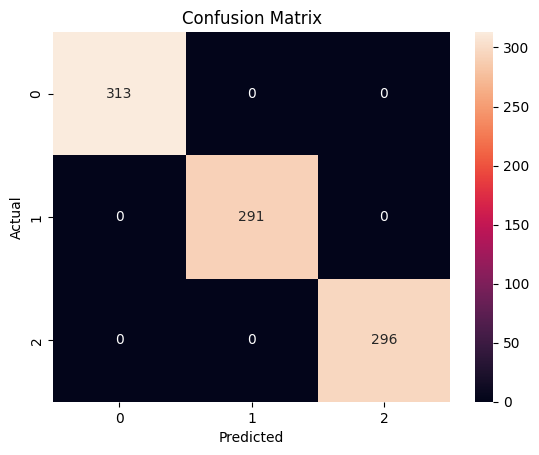

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()